In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [81]:
def kw_in_df(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(kakao_data[kakao_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return kakao_data[kakao_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [133]:
def kw_in_nouns(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [134]:
kw_in_nouns(kakao_data, '선물')

' 선물 ' 가 포함된 리뷰 총 803 건


1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                친구가 건강관리 하라고 선물해 주었습니다 !! 후기가 좋아서 기대했는데 맛있고 건강해지는 기분 입니당🥳
4                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [41]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [101]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        print(keyword, '키워드가 포함된 리뷰의 용언 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, '키워드가 포함된 리뷰의 명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, '키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'] + data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    else:
        return print('옵션 확인')

In [84]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [42]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [29]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)

In [50]:
kakao_data.rename(columns = {'review_text':'ReviewText'}, inplace = True)

In [51]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,ReviewText,rating,review_tag1,review_tag2,review_time,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고 물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안, 휴대, 때, 당, 충전, 국내, 산꿀, 수, 맛, 배송]","[따뜻하, 타, 먹, 있, 좋, 이, 간편하, 녹, 하, 간편하, 허기지, 간편하, 하, 좋, 이, 믿, 있, 좋, 빠르]"


In [31]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:eval(x))
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:eval(x))

리뷰 태그 전처리

In [13]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원          739
생일          592
감사          188
위로          187
건강           28
설날           16
결혼           15
시험           15
재미           14
취업/이직        12
스승의날         10
크리스마스         9
졸업/입학         6
어버이날          4
화이트데이         4
빼빼로데이         4
새해            4
임신/출산         4
추석            3
명절선물          3
명절            3
선물            3
코로나           2
선물용           2
추석선물          2
이사/집들이        2
발렌타인데이        2
건강회복          2
아프지마          2
쾌유            1
비밀            1
피로회복          1
목감기에좋다고       1
인연            1
목감기           1
석류꿀맛최고이다      1
퓨어석류아카        1
건강영양석류        1
면역력챙기기        1
감사마음          1
연말            1
꿀빠는시간         1
회복            1
어머님선물         1
기념품           1
감사의표시         1
임직축하          1
달달하시간         1
녹차원꿀스틱        1
사과            1
달달건강꿀스틱       1
선물용으로줌        1
백일/돌          1
코로나건강         1
면역역챙기기        1
감솨            1
200일선물        1
설             1
좋습니다          1
꿀             1
벌꿀            1
프로폴리스       

In [8]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구          865
직장동료        350
선/후배        209
형제/자매       121
나            97
연인           76
선생님          44
제자           37
자녀           28
부모님          26
썸            11
지인            6
조카            5
친척            2
언니            2
스트리머          1
선물            1
교회언니          1
핑크님           1
게임단톡방         1
감사합니다         1
고마운분          1
엠에이치글로비즈      1
직장            1
아들친구어머니       1
그냥선물          1
거래처선물         1
퓨어석류아카        1
동기            1
학부모님선물        1
친구딸           1
보낸이의정성        1
홀인원기념         1
나에게주는선물       1
삼실킬로미터        1
전도사님          1
학부모님          1
가족            1
생일            1
응원과건강기원       1
딸남자친구         1
건강            1
생일선물          1
선물용           1
학부형           1
형님            1
코로나응원위로       1
아이친구엄마        1
고객님           1
회원님           1
추석선물          1
동생            1
비마스터          1
학부            1
꿀             1
꿀해장           1
교회집사님         1
화줌마HZM        1
Name: count, dtype: int64

In [32]:
tag2 = ['친구', '연인', '썸', '형재/자매', '선/후배', '직장동료', '자녀', '부모님', '제자', '선생님', '나']
tag1 = ['생일', '응원', '감사', '재미', '결혼', '이사/집들이', '백일/돌', '임신/출산', '졸업/입학', '취업/이직', '시험', '위로', '사과', '반려동물', '설날', '건강', '스승의날']

In [33]:
kakao_data['review_tag1'] = kakao_data['review_tag1'].apply(lambda x:x if x in tag1 else '기타')

In [34]:
kakao_data['review_tag2'] = kakao_data['review_tag2'].apply(lambda x:x if x in tag2 else '기타')

In [36]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원        739
생일        592
감사        188
위로        187
기타         92
건강         28
설날         16
시험         15
결혼         15
재미         14
취업/이직      12
스승의날       10
졸업/입학       6
임신/출산       4
이사/집들이      2
백일/돌        1
사과          1
Name: count, dtype: int64

In [35]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구      865
직장동료    350
선/후배    209
기타      179
나        97
연인       76
선생님      44
제자       37
자녀       28
부모님      26
썸        11
Name: count, dtype: int64

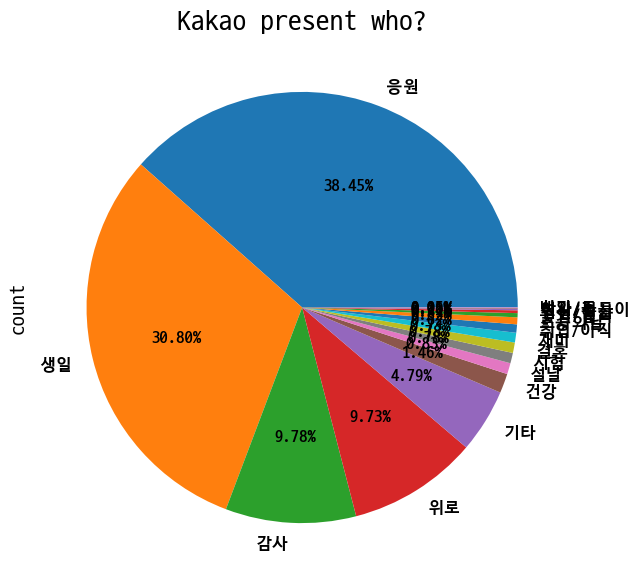

In [37]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

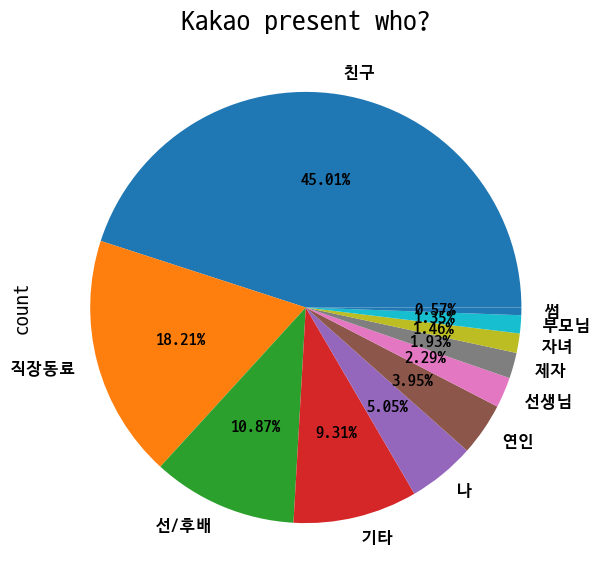

In [38]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag2'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

In [43]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고 물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안, 휴대, 때, 당, 충전, 국내, 산꿀, 수, 맛, 배송]","[따뜻하, 타, 먹, 있, 좋, 이, 간편하, 녹, 하, 간편하, 허기지, 간편하, 하, 좋, 이, 믿, 있, 좋, 빠르]"


In [47]:
kakao_noun_frequency = frequency_analysis(kakao_data['token_nouns_bareun'], 500)

In [48]:
kakao_noun_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kakao_noun_frequency.xlsx")

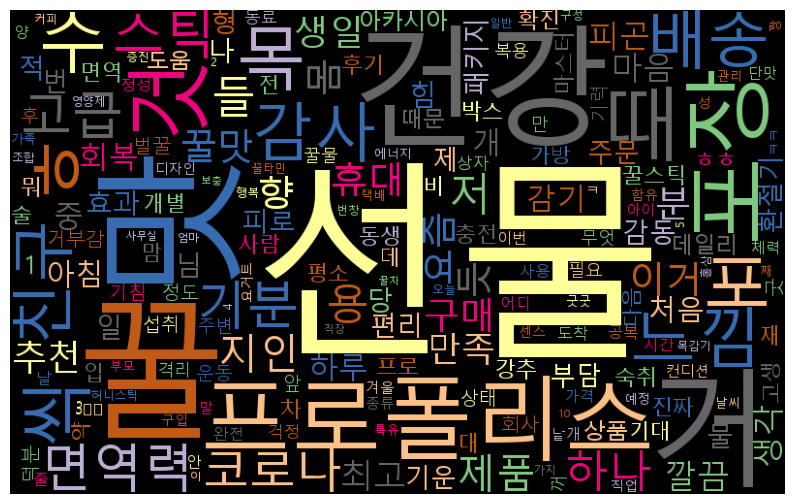

In [44]:
wc_analysis(kakao_data['token_nouns_bareun'])

가방 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


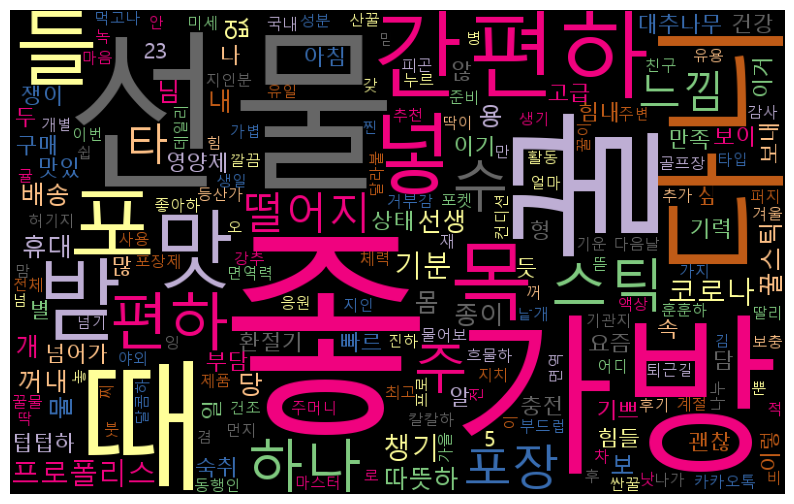

In [118]:
wc_kw(kakao_data, 3, '가방')

In [117]:
kw_in_nouns('가방')

' 가방 ' 가 포함된 리뷰 총 20 건


0                                                                                                                                                                                                                                                  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고  물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요
46                                                                                                                                                                                        미세먼지많은 요즘같은 환절기에 따뜻하게 한포 물에 타먹으면 칼칼해진 목 건강에 좋더라구요.항상 쟁여두고 수시로 먹고 있어요. 스틱형이라 간편해서 가방 속에 쏙 넣고 다니다 살짝 당떨어졌을때도 매우 유용했습니다.^^  숙취다음날 꿀물타먹기도 간편해서 저는 이제품. 강추합니다.  저도 카카오톡 선물하기로 간편하게 지인분들께 보냈더니 다들 좋아하시네요.
133                                                                                                                                                                                                                  가벼운느낌의 꿀스틱은 많이 먹어봤는데… 프

용언 제거

In [109]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ']

In [110]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])

In [112]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지']

In [113]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [69]:
kakao_data['token_verbs_bareun'][0]

['따뜻하',
 '타',
 '먹',
 '있',
 '좋',
 '이',
 '간편하',
 '녹',
 '하',
 '간편하',
 '허기지',
 '간편하',
 '하',
 '좋',
 '이',
 '믿',
 '있',
 '좋',
 '빠르']

In [120]:
kakao_friend = kakao_data[kakao_data['review_tag2']=='친구']

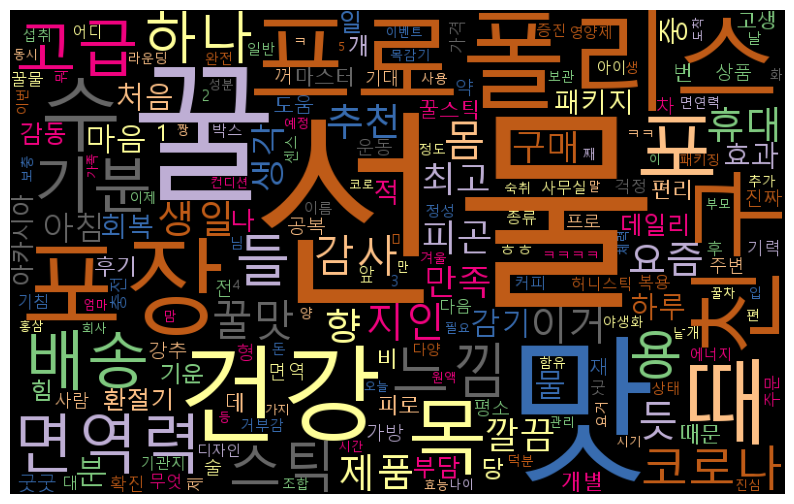

In [124]:
wc_analysis(kakao_friend['token_nouns_bareun'])

In [ ]:
frequency_analysis(kakao_friend['token_nouns_bareun'], 500)

In [ ]:
kakao_data['']